## 『本次練習內容』
#### 學習搭建RPN層

## 『本次練習目的』
  #### 了解Object Detection演算法中是如何做到分類又回歸BBOX座標

In [11]:
from keras.models import Model
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, TimeDistributed
from keras.utils import plot_model
import matplotlib.pyplot as plt
import cv2


In [2]:

input_shape_img = (1024, 1024, 3)
img_input = Input(shape=input_shape_img)
'''先過一般CNN層提取特徵'''
def nn_base(img_input):
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    # 縮水1/2 1024x1024 -> 512x512
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    # 縮水1/2 512x512 -> 256x256
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    # 縮水1/2 256x256 -> 128x128
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    # 縮水1/2 128x128 -> 64x64
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)

    # 最後返回的x是64x64x512的feature map。
    return x

In [3]:
'''過RPN'''
def rpn(base_layers, num_anchors):

    x = Conv2D(filters=18, kernel_size=(1,1), padding='same', activation='relu', kernel_initializer='normal', name='rpn_conv1')(base_layers)

    # rpn分類和迴歸
    x_class = Conv2D(num_anchors*2, (1, 1), activation='softmax',name='rpn_out_class')(x)
    x_reg = Conv2D(num_anchors *4, (1, 1), activation='linear', name='rpn_out_regress')(x)

    return x_class, x_reg, base_layers

In [4]:
base_layers=nn_base(img_input)

In [5]:
x_class, x_reg, base_layers=rpn(base_layers, 9)

In [6]:
print('Classification支線：',x_class) #'''確認深度是否為18'''
print('BBOX Regression 支線：',x_reg) #'''確認深度是否為36'''
print('CNN Output：',base_layers)

Classification支線： Tensor("rpn_out_class/truediv:0", shape=(?, 64, 64, 18), dtype=float32)
BBOX Regression 支線： Tensor("rpn_out_regress/BiasAdd:0", shape=(?, 64, 64, 36), dtype=float32)
CNN Output： Tensor("block5_conv3/Relu:0", shape=(?, 64, 64, 512), dtype=float32)


In [24]:


plot_model(Model(inputs=img_input, outputs=x_class), show_shapes=True, show_layer_names= True,  to_file='x_class.png')
plot_model(Model(inputs=img_input, outputs=x_reg), show_shapes=True, show_layer_names= True,  to_file='x_reg.png')

x_class_img = cv2.imread('x_class.png')
x_reg_img = cv2.imread('x_reg.png')


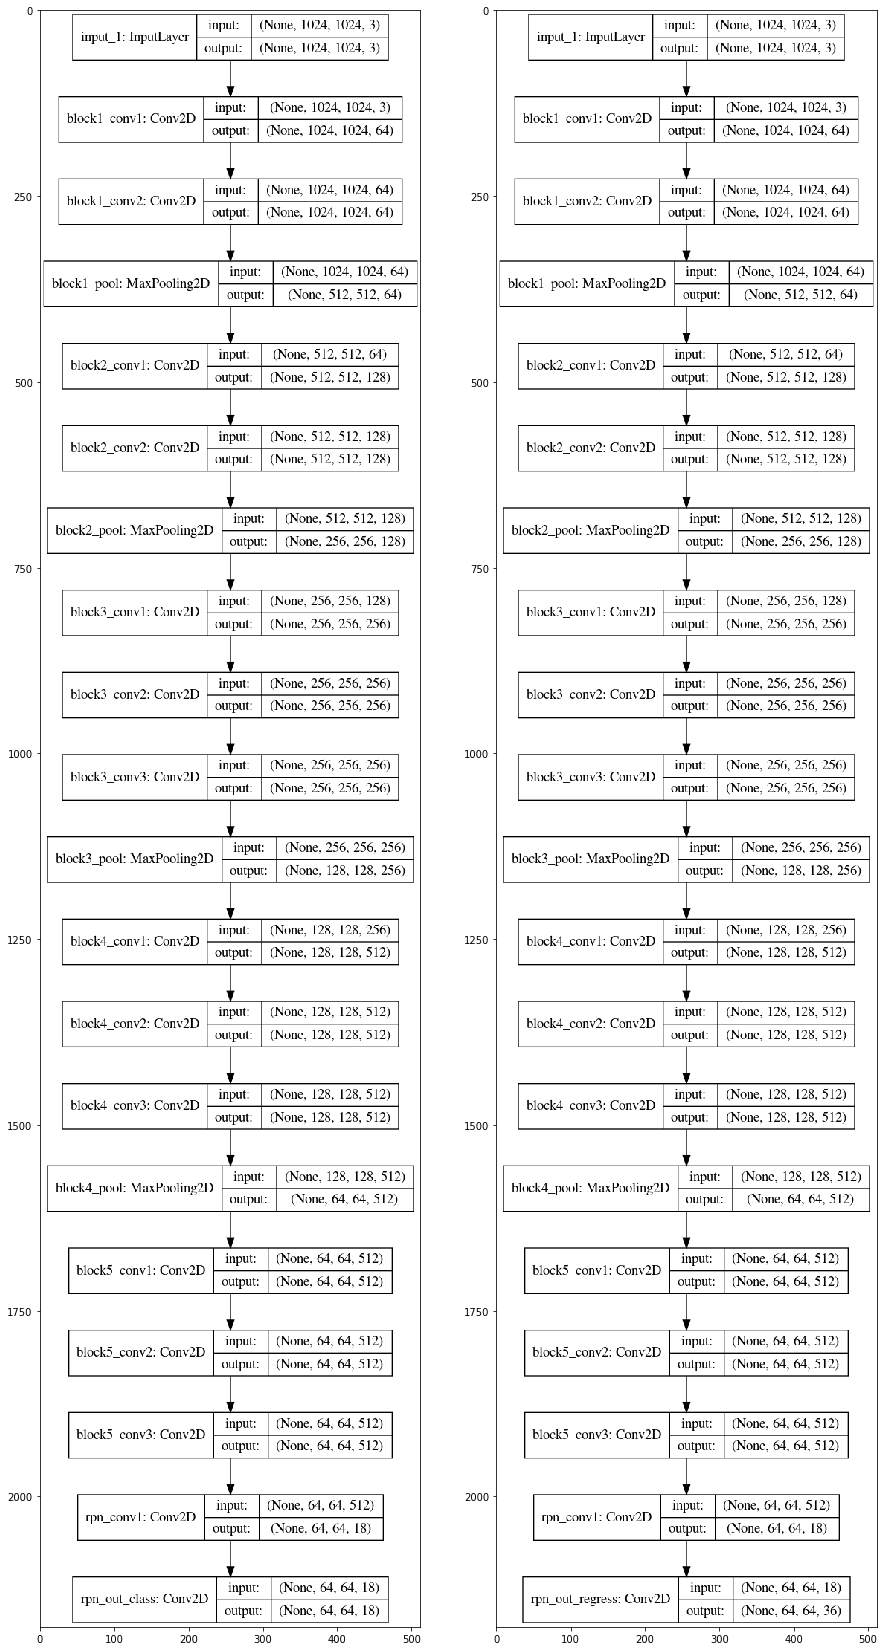

In [30]:
fig=plt.figure(figsize=(15,60))
ax = fig.add_subplot(121)
ax.imshow(x_class_img)
ax = fig.add_subplot(122)
ax.imshow(x_reg_img)